In [ ]:
import random
# --- Bandit ---
class Bandit(object):
  def __init__(self, N):
    # N = number of arms
    self.N = N
  def actions(self):
    result = []
    for i in range(0,self.N):
      result.append(i)
    return result
  def rewardA(self, action):
    p =[.1, .2]
    rand=random.random()
    if rand < p[action]:
      return 1
    else:
      return 0
  def rewardB(self, action):
    p =[.8, .9]
    rand=random.random()
    if rand < p[action]:
      return 1
    else:
      return 0

In [ ]:
myBandit = Bandit(N=2)

In [ ]:
myBandit.actions()

[0, 1]

In [ ]:
def eGreedy(myBandit, epsilon, max_iteration):
  # Initialization 
  Q = [0]*myBandit.N 
  count = [0]*myBandit.N
  epsilon = epsilon
  r = 0
  R = []
  R_avg = [0]*1
  max_iter = max_iteration
  # Incremental Implementation
  for iter in range(1,max_iter):
    if random.random() > epsilon:
      action = Q.index(max(Q)) # Exploit/ Greed
    else:
      action = random.choice(myBandit.actions()) # Explore
    r = myBandit.rewardB(action)
    R.append(r)
    count[action] = count[action]+1
    Q[action] = Q[action]+(r - Q[action])/count[action]
    R_avg.append(R_avg[iter-1] + (r-R_avg[iter-1])/iter)

  return Q, R_avg, R

In [ ]:
Q,R_avg,R = eGreedy(myBandit, 0.1, 1000)

In [ ]:
Q

[0.818181818181818, 0.8971061093247585]

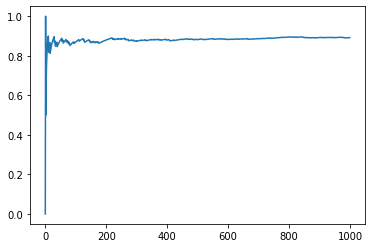

In [ ]:
import matplotlib.pyplot as plt
plt.plot(R_avg)